Multithreading in Python

What is a Process in Python?

A process is an instance of a computer program that is being executed. Any process has 3 basic components:

An executable program.

The associated data needed by the program (variables, workspace, buffers, etc.)

The execution context of the program (State of the process)

An Intro to Python Threading

A thread is an entity within a process that can be scheduled for execution. Also, it is the smallest unit of processing that can be performed in an OS (Operating System). In simple words, a thread is a sequence of such instructions within a program that can be executed independently of other code. For simplicity, you can assume that a thread is simply a subset of a process! 

A thread contains all this information in a Thread Control Block (TCB):

Thread Identifier: Unique id (TID) is assigned to every new thread

Stack pointer: Points to the thread’s stack in the process. The stack contains the local variables under the thread’s scope.

Program counter: a register that stores the address of the instruction currently being executed by a thread.

Thread state: can be running, ready, waiting, starting, or done.

Thread’s register set: registers assigned to thread for computations.

Parent process Pointer: A pointer to the Process control block (PCB) of the process that the thread lives on.

Consider the diagram below to understand the relationship between the process and its thread:

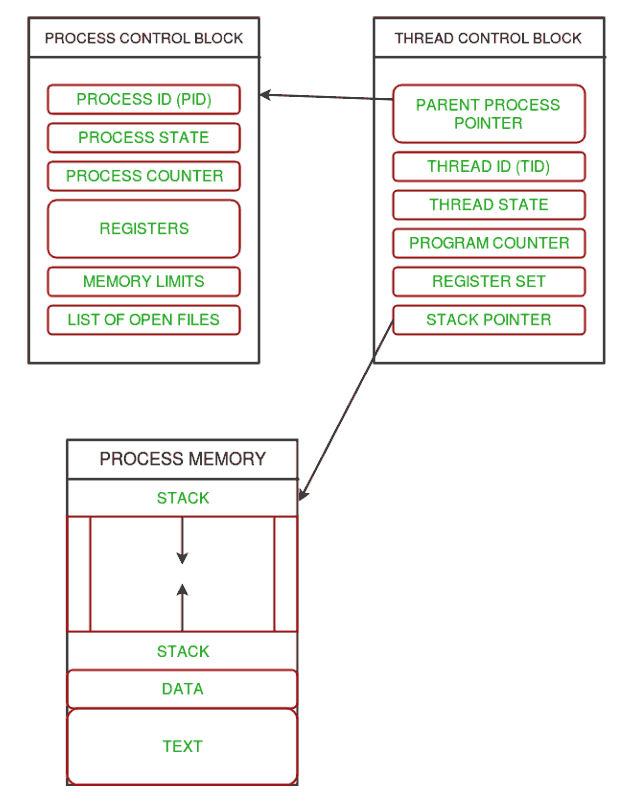

Multiple threads can exist within one process where:

Each thread contains its own register set and local variables (stored in the stack).

All threads of a process share global variables (stored in heap) and the program code.

Consider the diagram below to understand how multiple threads exist in memory:

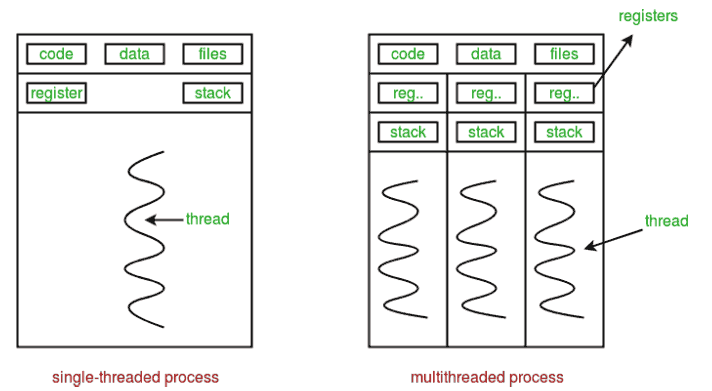

An Intro to Threading in Python

Multithreading is defined as the ability of a processor to execute multiple threads concurrently. In a simple, single-core CPU, it is achieved using frequent switching between threads. This is termed context switching. In context switching, the state of a thread is saved and the state of another thread is loaded whenever any interrupt (due to I/O or manually set) takes place. Context switching takes place so frequently that all the threads appear to be running parallelly (this is termed multitasking).

Consider the diagram below in which a process contains two active threads: 

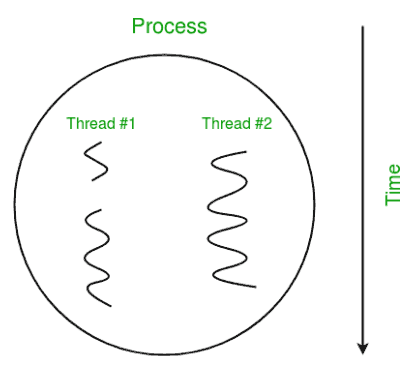

Multithreading in Python

the threading module provides a very simple and intuitive API for spawning multiple threads in a program. Let us try to understand multithreading code step-by-step.

Step 1: Import Module

First, import the threading module.

import threading

Step 2: Create a Thread

To create a new thread, we create an object of the Thread class. It takes the ‘target’ and ‘args’ as the parameters. The target is the function to be executed by the thread whereas the args is the arguments to be passed to the target function.

t1 = threading.Thread(target, args)

t2 = threading.Thread(target, args)

Step 3: Start a Thread

To start a thread, we use the start() method of the Thread class.

t1.start()

t2.start()

Step 4: End the thread Execution

Once the threads start, the current program (you can think of it like a main thread) also keeps on executing. In order to stop the execution of the current program until a thread is complete, we use the join() method.

t1.join()

t2.join()

As a result, the current program will first wait for the completion of t1 and then t2. Once, they are finished, the remaining statements of the current program are executed.



In [2]:
import threading


def print_cube(num):
	print("Cube: {}" .format(num * num * num))


def print_square(num):
	print("Square: {}" .format(num * num))


if __name__ =="__main__":
    t1 = threading.Thread(target=print_square, args=(10,))
    t2 = threading.Thread(target=print_cube, args=(10,))
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    
    print("Done!")


Square: 100
Cube: 1000
Done!


This code demonstrates how to use Python’s threading module to calculate the square and cube of a number concurrently. Two threads, t1 and t2, are created to perform these calculations. They are started, and their results are printed in parallel before the program prints “Done!” when both threads have finished. Threading is used to achieve parallelism and improve program performance when dealing with computationally intensive tasks.

In [8]:
import threading
import os

def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))

def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))

if __name__ == "__main__":  
    
    print("ID of process running main program: {}".format(os.getpid())) 
    
    print("Main thread name: {}".format(threading.current_thread().name))  # Here thread name will be "Main Thread" because __main__ is a magic method name.
    
    t1 = threading.Thread(target=task1, name='t1') # Here target attribute will have the task1 i.e. the name of the function whereas name attribute will have the thread name.
    t2 = threading.Thread(target=task2, name='t2')
    
    ## An example of the parallel threading.

    t1.start()
    t2.start()
    
    t1.join()
    t2.join()


ID of process running main program: 2400
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 2400
Task 2 assigned to thread: t2
ID of process running task 2: 2400


In [9]:
import threading
import os

def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))

def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))

if __name__ == "__main__":  
    
    print("ID of process running main program: {}".format(os.getpid())) 
    
    print("Main thread name: {}".format(threading.current_thread().name))  # Here thread name will be "Main Thread" because __main__ is a magic method name.
    
    t1 = threading.Thread(target=task1, name='t1') # Here target attribute will have the task1 i.e. the name of the function whereas name attribute will have the thread name.
    t2 = threading.Thread(target=task2, name='t2')
    
    # This is not an example of parallel threading but synchronised threading.
    t1.start()
    t1.join()
    
    print("Done!")
    
    t2.start()
    t2.join()
    print("Done!")


ID of process running main program: 2400
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 2400
Done!
Task 2 assigned to thread: t2
ID of process running task 2: 2400
Done!


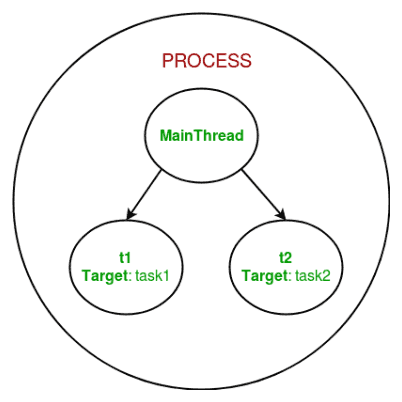

Python ThreadPool

A thread pool is a collection of threads that are created in advance and can be reused to execute multiple tasks. The concurrent.futures module in Python provides a ThreadPoolExecutor class that makes it easy to create and manage a thread pool. 

In this example, we define a function worker that will run in a thread. We create a ThreadPoolExecutor with a maximum of 2 worker threads. We then submit two tasks to the pool using the submit method. The pool manages the execution of the tasks in its worker threads. We use the shutdown method to wait for all tasks to complete before the main thread continues.

Multithreading can help you make your programs more efficient and responsive. However, it’s important to be careful when working with threads to avoid issues such as race conditions and deadlocks.

This code uses a thread pool created with concurrent.futures.ThreadPoolExecutor to run two worker tasks concurrently. The main thread waits for the worker threads to finish using pool.shutdown(wait=True). This allows for efficient parallel processing of tasks in a multi-threaded environment.

In [12]:
import concurrent.futures

def worker():
	print("Worker thread running")

pool = concurrent.futures.ThreadPoolExecutor(max_workers=4)

pool.submit(worker)
pool.submit(worker)
pool.submit(worker)
pool.submit(worker)

pool.shutdown(wait=True)

print("Main thread continuing to run")

Worker thread running
Worker thread running
Worker thread running
Worker thread running
Main thread continuing to run


In [14]:
#### This method should be avoided to use as we want all process to run parallely and then main thread to end.
#### Also, main thread is the parent process and worker threads are the child process if parent process ends first then that will be an orphan process which should be avoided.

def worker():
	print("Worker thread running")

pool = concurrent.futures.ThreadPoolExecutor(max_workers=4)

pool.submit(worker)
pool.submit(worker)
pool.submit(worker)
pool.submit(worker)


pool.shutdown(wait=False)

print("Main thread continuing to run")

Worker thread running
Worker thread running
Worker thread running
Main thread continuing to run
Worker thread running


In [1]:
import threading

In [2]:
def test(id):
    print("this is the program id of the test function %d" % id)

In [3]:
thread = [threading.Thread(target = test, args = (i,)) for i in [10, 20, 30]]

In [5]:
thread   # for a single core, it created 3 threads.

[<Thread(Thread-5, initial)>,
 <Thread(Thread-6, initial)>,
 <Thread(Thread-7, initial)>]

In [6]:
import urllib.request


In [7]:
import urllib.request

def file_download(url , filename):
    urllib.request.urlretrieve(url , filename)


In [8]:
file_download('https://raw.githubusercontent.com/itsfoss/text-files/master/agatha.txt' , "test1.txt")

In [9]:
url_list = ['https://raw.githubusercontent.com/itsfoss/text-files/master/agatha.txt' , 'https://raw.githubusercontent.com/itsfoss/text-files/master/sherlock.txt' ,'https://raw.githubusercontent.com/itsfoss/text-files/master/sample_log_file.txt' ]

In [10]:
data_file_list = ['data1.txt', 'data2.txt','data3.txt']

In [11]:
import threading

In [12]:
thread = [threading.Thread(target = file_download, args = (url_list[i], data_file_list[i])) for i in range(len(url_list))]

In [13]:
thread

[<Thread(Thread-107, initial)>,
 <Thread(Thread-108, initial)>,
 <Thread(Thread-109, initial)>]

In [14]:
for i in thread:
    i.start()

In [15]:
thread

[<Thread(Thread-107, stopped 23248)>,
 <Thread(Thread-108, stopped 7244)>,
 <Thread(Thread-109, stopped 22708)>]

In [18]:
import time

In [17]:
def test2(x):
    for i in range(10):
        print("The value of x is %d and value of i is %d" %(x, i))

In [19]:
test2(2)

The value of x is 2 and value of i is 0
The value of x is 2 and value of i is 1
The value of x is 2 and value of i is 2
The value of x is 2 and value of i is 3
The value of x is 2 and value of i is 4
The value of x is 2 and value of i is 5
The value of x is 2 and value of i is 6
The value of x is 2 and value of i is 7
The value of x is 2 and value of i is 8
The value of x is 2 and value of i is 9


In [20]:
def test2(x):
    for i in range(10):
        print("The value of x is %d and value of i is %d" %(x, i))
        time.sleep(1)

In [24]:
t = [threading.Thread(target=test2, args = (i, )) for i in [10, 20, 30, 40]]

In [ ]:
for i in t:
    i.start()

The value of x is 10 and value of i is 0
The value of x is 20 and value of i is 0
The value of x is 30 and value of i is 0
The value of x is 40 and value of i is 0
The value of x is 40 and value of i is 1
The value of x is 20 and value of i is 1
The value of x is 10 and value of i is 1
The value of x is 30 and value of i is 1


The value of x is 30 and value of i is 2The value of x is 10 and value of i is 2
The value of x is 40 and value of i is 2
The value of x is 20 and value of i is 2

The value of x is 10 and value of i is 3The value of x is 20 and value of i is 3
The value of x is 40 and value of i is 3
The value of x is 30 and value of i is 3

The value of x is 10 and value of i is 4
The value of x is 30 and value of i is 4
The value of x is 40 and value of i is 4
The value of x is 20 and value of i is 4
The value of x is 20 and value of i is 5
The value of x is 30 and value of i is 5
The value of x is 10 and value of i is 5
The value of x is 40 and value of i is 5
The value of x is 40 and value of i is 6The value of x is 10 and value of i is 6

The value of x is 30 and value of i is 6
The value of x is 20 and value of i is 6
The value of x is 20 and value of i is 7The value of x is 30 and value of i is 7
The value of x is 40 and value of i is 7
The value of x is 10 and value of i is 7

The value of x i

In [26]:
shared_var = 5
lock = threading.Lock()

In [27]:
def test3(x):
    global shared_var
    with lock:
        shared_var = shared_var + 2
        print("value of x is %d and value of shared variable is %d" %(x, shared_var))

In [28]:
t = [threading.Thread(target = test3, args = (i, )) for i in [100, 200, 300, 400]]

In [29]:
for i in t:
    i.start()

value of x is 100 and value of shared variable is 7
value of x is 200 and value of shared variable is 9
value of x is 300 and value of shared variable is 11
value of x is 400 and value of shared variable is 13


In [33]:
def test3(x):
    global shared_var
    with lock:
        shared_var = shared_var + 2
        print("value of x is %d and value of shared variable is %d" %(x, shared_var))
        time.sleep(2)

In [34]:
t = [threading.Thread(target = test3, args = (i, )) for i in [100, 200, 300, 400]]

In [35]:
for i in t: 
    i.start()

value of x is 100 and value of shared variable is 23
value of x is 200 and value of shared variable is 25


value of x is 300 and value of shared variable is 27
value of x is 400 and value of shared variable is 29


In [36]:
lock = threading.Lock()

In [37]:
def test2(x):
    with lock:
        for i in range(10):
            print("The value of x is %d and value of i is %d" %(x, i))
            time.sleep(1)

In [38]:
t = [threading.Thread(target=test2, args = (i, )) for i in [10, 20, 30, 40]]

In [ ]:
for i in t:
    i.start()

The value of x is 10 and value of i is 0
The value of x is 10 and value of i is 1
The value of x is 10 and value of i is 2
The value of x is 10 and value of i is 3


The value of x is 10 and value of i is 4
The value of x is 10 and value of i is 5
The value of x is 10 and value of i is 6
The value of x is 10 and value of i is 7
The value of x is 10 and value of i is 8
The value of x is 10 and value of i is 9
The value of x is 20 and value of i is 0
The value of x is 20 and value of i is 1
The value of x is 20 and value of i is 2
The value of x is 20 and value of i is 3
The value of x is 20 and value of i is 4
The value of x is 20 and value of i is 5
The value of x is 20 and value of i is 6
The value of x is 20 and value of i is 7
The value of x is 20 and value of i is 8
The value of x is 20 and value of i is 9
The value of x is 30 and value of i is 0
The value of x is 30 and value of i is 1
The value of x is 30 and value of i is 2
The value of x is 30 and value of i is 3
The value of x is 30 and value of i is 4
The value of x is 30 and value of i is 5
The value of x is 30 and value of i is 6
The value of x is 30 and value of i is 7
The value of x i